In [54]:
from cmdstanpy import CmdStanModel
import numpy as np
import matplotlib.pyplot as plt

In [55]:
data_genetator = CmdStanModel(stan_file = 'generate_data.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [56]:
I= 5
N= 6
DoB= 200699
seed=int(DoB*1e4+100*I+N)
print(seed)
generated_data = data_genetator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True,seed=seed)

INFO:cmdstanpy:CmdStan start processing


2006990506


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Coefficients of linear model

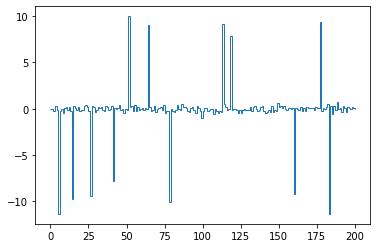

In [57]:
beta_s = generated_data.stan_variable('beta')
plt.stairs(generated_data.stan_variable('beta')[0])

Model 1 - uniform prior for beta

In [58]:
model_uniform = CmdStanModel(stan_file = 'model1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [59]:
data_for_inference = {'N':100,
                      'M':200,
                      'X':generated_data.stan_variable('X')[0],
                      'y':generated_data.stan_variable('y')[0]
                      }

In [60]:
fit_unf = model_uniform.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 2 |▉         | 00:06 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |▉         | 00:07 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |▉         | 00:08 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:16 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |█▎        | 00:17 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:23 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 4 |█▊        | 00:24 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |█▊        | 00:26 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:30 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 4 |██▎       | 00:31 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 2 |██▎       | 00:34 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:37 Iteration:  400 / 2000 [ 20%]  (Warmup)


cha


INFO:cmdstanpy:CmdStan done processing.


In [61]:
print(fit_unf.diagnose())

Processing csv files: /tmp/tmpi6dtn17k/model1-20220403125403_1.csv, /tmp/tmpi6dtn17k/model1-20220403125403_2.csv, /tmp/tmpi6dtn17k/model1-20220403125403_3.csv, /tmp/tmpi6dtn17k/model1-20220403125403_4.csv

Checking sampler transitions treedepth.
3999 of 4000 (99.97%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
1 of 4000 (0.03%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.06, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If 

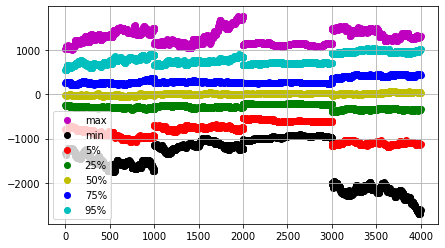

In [62]:
fit_beta = fit_unf.stan_variable('beta')
x_list = [i for i in range (len(fit_beta))]
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in fit_beta:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'm')
plt.scatter(x_list, min_height, color = 'k')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'g')
plt.scatter(x_list, fifty_quantile,  color = 'y')
plt.scatter(x_list, sevenFive_quantile, color = 'b')
plt.scatter(x_list, nineFive_qantile,  color = 'c')
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()

Substract true values from fitted betas and make the same plot (residues)

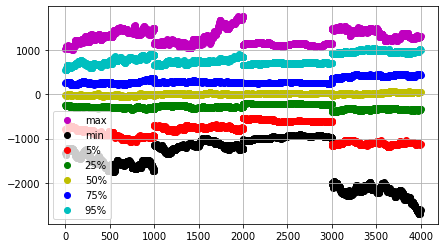

In [63]:
result = fit_beta - beta_s
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in result:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'm')
plt.scatter(x_list, min_height, color = 'k')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'g')
plt.scatter(x_list, fifty_quantile,  color = 'y')
plt.scatter(x_list, sevenFive_quantile, color = 'b')
plt.scatter(x_list, nineFive_qantile,  color = 'c')
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()

Model 2 - Narrow weakly informative prior

In [64]:
model_reg = CmdStanModel(stan_file = 'model2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [65]:
fit_reg = model_reg.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status

chain 3 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 4 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 2 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain


INFO:cmdstanpy:CmdStan done processing.


In [66]:
print(fit_reg.diagnose())

Processing csv files: /tmp/tmpi6dtn17k/model2-20220403125635_1.csv, /tmp/tmpi6dtn17k/model2-20220403125635_2.csv, /tmp/tmpi6dtn17k/model2-20220403125635_3.csv, /tmp/tmpi6dtn17k/model2-20220403125635_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



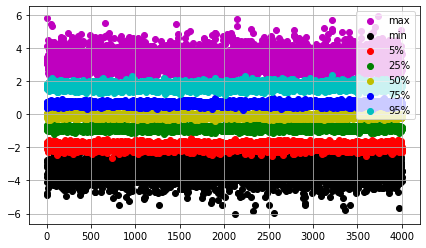

In [67]:
fit_beta = fit_reg.stan_variable('beta')
x_list = [i for i in range (len(fit_beta))]
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in fit_beta:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'm')
plt.scatter(x_list, min_height, color = 'k')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'g')
plt.scatter(x_list, fifty_quantile,  color = 'y')
plt.scatter(x_list, sevenFive_quantile, color = 'b')
plt.scatter(x_list, nineFive_qantile,  color = 'c')
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()

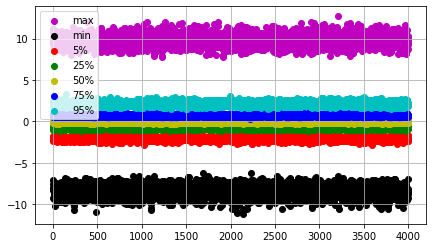

In [68]:
result = fit_beta - beta_s
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in result:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'm')
plt.scatter(x_list, min_height, color = 'k')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'g')
plt.scatter(x_list, fifty_quantile,  color = 'y')
plt.scatter(x_list, sevenFive_quantile, color = 'b')
plt.scatter(x_list, nineFive_qantile,  color = 'c')
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()

Model 3 - Sparsity enforcing prior

In [69]:
model_lap = CmdStanModel(stan_file = 'model3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [70]:
fit_lap = model_lap.sample(data=data_for_inference,seed=seed,adapt_delta=0.99,max_treedepth=12)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status

chain 1 |▉         | 00:05 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |▉         | 00:06 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |▉         | 00:07 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▎        | 00:15 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |█▊        | 00:17 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |█▊        | 00:23 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |█▊        | 00:25 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 3 |█▎        | 00:26 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:32 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 4 |███▏      | 00:39 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |██▋       | 00:44 Iteration:  400 / 2000 [ 20%]  (Warmup)

ch


INFO:cmdstanpy:CmdStan done processing.


In [71]:
print(fit_lap.diagnose())

Processing csv files: /tmp/tmpi6dtn17k/model3-20220403125646_1.csv, /tmp/tmpi6dtn17k/model3-20220403125646_2.csv, /tmp/tmpi6dtn17k/model3-20220403125646_3.csv, /tmp/tmpi6dtn17k/model3-20220403125646_4.csv

Checking sampler transitions treedepth.
1000 of 4000 (25.00%) transitions hit the maximum treedepth limit of 12, or 2^12 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.02, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.05:
  sigma
Such high values indicate incomplete mixing and biased estimation.
You should consider reg

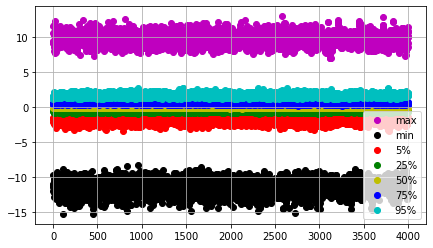

In [72]:
fit_beta = fit_lap.stan_variable('beta')
x_list = [i for i in range (len(fit_beta))]
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in fit_beta:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'm')
plt.scatter(x_list, min_height, color = 'k')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'g')
plt.scatter(x_list, fifty_quantile,  color = 'y')
plt.scatter(x_list, sevenFive_quantile, color = 'b')
plt.scatter(x_list, nineFive_qantile,  color = 'c')
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()

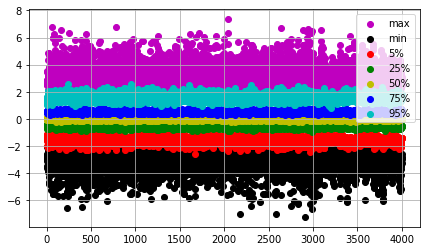

In [73]:
result = fit_beta - beta_s
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in result:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'm')
plt.scatter(x_list, min_height, color = 'k')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'g')
plt.scatter(x_list, fifty_quantile,  color = 'y')
plt.scatter(x_list, sevenFive_quantile, color = 'b')
plt.scatter(x_list, nineFive_qantile,  color = 'c')
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()